### IMPORTS

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# imports partially
from sklearn import metrics
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle, class_weight
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout

### SETTINGS

In [3]:
# all initial settings
sns.set()
warnings.filterwarnings('ignore')

### HELPERS

In [44]:
def show_confusion_matrix(target, prediction, score=None):
    cm = metrics.confusion_matrix(target, prediction)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        score_title = 'Accuracy Score: {0}'.format(round(score, 5))
        plt.title(score_title, size = 14)
    classification_report = pd.DataFrame.from_dict(metrics.classification_report(target, prediction, output_dict=True))
    classification_report.round(2)
    display(classification_report.round(2))

def preprocess_data(df):
    
    processed_df = df
    processed_df.drop('id',axis=1)    
    for col in processed_df.columns:
        processed_df[col] = processed_df[col].fillna(0)
        processed_df[col] = processed_df[col].replace(to_replace="na",value=0)
    return processed_df

### DATA EXPLORATION

In [5]:
# update path with actual dataset path
path_train = 'equip_failures_training_set.csv'
path_validation = 'equip_failures_test_set.csv'

In [6]:
# Create dataframe for training dataset and print five first rows as preview
train_df_raw = pd.read_csv(path_train)

In [7]:
train_df_raw.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,...,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
non_time_series_columns = [
 'sensor1_measure',
 'sensor2_measure',
 'sensor3_measure',
 'sensor4_measure',
 'sensor5_measure',
 'sensor6_measure',
 'sensor8_measure',
 'sensor9_measure',
 'sensor10_measure',
 'sensor11_measure',
 'sensor12_measure',
 'sensor13_measure',
 'sensor14_measure',
 'sensor15_measure',
 'sensor16_measure',
 'sensor17_measure',
 'sensor18_measure',
 'sensor19_measure',
 'sensor20_measure',
 'sensor21_measure',
 'sensor22_measure',
 'sensor23_measure',
 'sensor27_measure',
 'sensor28_measure',
 'sensor29_measure',
 'sensor30_measure',
 'sensor31_measure',
 'sensor32_measure',
 'sensor33_measure',
 'sensor34_measure',
 'sensor35_measure',
 'sensor36_measure',
 'sensor37_measure',
 'sensor38_measure',
 'sensor39_measure',
 'sensor40_measure',
 'sensor41_measure',
 'sensor42_measure',
 'sensor43_measure',
 'sensor44_measure',
 'sensor45_measure',
 'sensor46_measure',
 'sensor47_measure',
 'sensor48_measure',
 'sensor49_measure',
 'sensor50_measure',
 'sensor51_measure',
 'sensor52_measure',
 'sensor53_measure',
 'sensor54_measure',
 'sensor55_measure',
 'sensor56_measure',
 'sensor57_measure',
 'sensor58_measure',
 'sensor59_measure',
 'sensor60_measure',
 'sensor61_measure',
 'sensor62_measure',
 'sensor63_measure',
 'sensor65_measure',
 'sensor66_measure',
 'sensor67_measure',
 'sensor68_measure',
 'sensor70_measure',
 'sensor71_measure',
 'sensor72_measure',
 'sensor73_measure',
 'sensor74_measure',
 'sensor75_measure',
 'sensor76_measure',
 'sensor77_measure',
 'sensor78_measure',
 'sensor79_measure',
 'sensor80_measure',
 'sensor81_measure',
 'sensor82_measure',
 'sensor83_measure',
 'sensor84_measure',
 'sensor85_measure',
 'sensor86_measure',
 'sensor87_measure',
 'sensor88_measure',
 'sensor89_measure',
 'sensor90_measure',
 'sensor91_measure',
 'sensor92_measure',
 'sensor93_measure',
 'sensor94_measure',
 'sensor95_measure',
 'sensor96_measure',
 'sensor97_measure',
 'sensor98_measure',
 'sensor99_measure',
 'sensor100_measure',
 'sensor101_measure',
 'sensor102_measure',
 'sensor103_measure',
 'sensor104_measure',
 'sensor106_measure',
 'sensor107_measure']

In [9]:
train_df_raw.target.value_counts()

0    59000
1     1000
Name: target, dtype: int64

In [10]:
train_df_raw = train_df_raw.drop(columns=non_time_series_columns)

In [11]:
train_df_raw.target.value_counts()

0    59000
1     1000
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

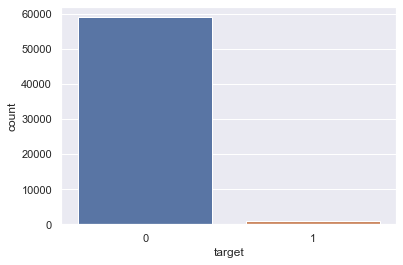

In [12]:
sns.countplot(train_df_raw['target'],label="Count")

In [13]:
all_pos = train_df_raw.loc[train_df_raw['target'] == 1]
negative_sample = train_df_raw.loc[train_df_raw['target'] == 0]
all_neg = train_df_raw.loc[train_df_raw['target'] == 0]
chosen_idx = np.random.choice(59000, replace=False, size=8000)
all_neg_trimmed = all_neg.iloc[chosen_idx]
all_neg_trimmed.head()

,id,target,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,...,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9
54871,54872,0,0,0,0,0,570,639922,1570432,570158,...,435110,550082,390274,221864,513392,448660,193620,52334,16570,170
29254,29255,0,0,0,0,0,12566,939930,3451054,983242,...,768122,1082762,805454,345030,625550,462880,359748,266368,649088,38150
10518,10519,0,0,0,0,0,4504,426796,1553574,131132,...,345142,383224,314780,193072,387962,247300,139088,64330,42012,272
22105,22106,0,0,0,0,0,1788,197506,1516002,761168,...,342736,456282,310030,151482,304700,300052,213988,155204,257116,26972
37090,37091,0,0,0,0,0,11222,1845322,1997008,659498,...,924050,2138172,574780,266666,324416,163378,86356,31304,23156,16


<AxesSubplot:xlabel='target', ylabel='count'>

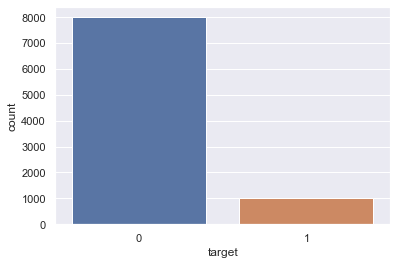

In [14]:
frames = [all_neg_trimmed, all_pos]

result = shuffle(pd.concat(frames))
sns.countplot(result['target'],label="Count")

### Data Cleanup

In [15]:
train_df = train_df_raw.copy()
X = train_df.drop(['target'], 1)
Y = train_df['target']

X = preprocess_data(X)
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)
class_weight_dict = dict(enumerate(class_weights))

### FFNN

In [17]:
def build_fnn(optimizer='sgd'):
    fnn = Sequential()

    # adding input layers
    fnn.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(16, 71)))
    units = [128,128,64,64]
    for unit in units:
        fnn.add(Dense(units=unit, kernel_initializer='glorot_uniform', activation='relu'))
        fnn.add(Dropout(rate=0.3))

    # adding output layer
    fnn.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the FNN
    fnn.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    return fnn

In [18]:
fnn = build_fnn()
# Training the FFNN
callback = callbacks.EarlyStopping(monitor='loss', patience=10)
history = fnn.fit(X_train, Y_train, batch_size=16, epochs=50, validation_data=(X_test, Y_test),class_weight=class_weight_dict, callbacks=[callback])

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
3000/3000 [==============================] - 17s 2ms/step - loss: 0.1364 - accuracy: 0.7860 - val_loss: 0.0721 - val_accuracy: 0.9276
Epoch 2/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0793 - accuracy: 0.9367 - val_loss: 0.0682 - val_accuracy: 0.9301
Epoch 3/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0864 - accuracy: 0.9331 - val_loss: 0.0578 - val_accuracy: 0.9370
Epoch 4/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0760 - accuracy: 0.9387 - val_loss: 0.0643 - val_accuracy: 0.9332
Epoch 5/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0781 - accuracy: 0.9397 - val_loss: 0.0595 - val_accuracy: 0.9370
Epoch 6/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0639 - accuracy: 0.9400 - val_loss: 0.0582 - val_accuracy: 0.93

3000/3000 [==============================] - 4s 1ms/step - loss: 0.0455 - accuracy: 0.9522 - val_loss: 0.0447 - val_accuracy: 0.9585
Epoch 49/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0462 - accuracy: 0.9481 - val_loss: 0.0445 - val_accuracy: 0.9535
Epoch 50/50
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0454 - accuracy: 0.9588 - val_loss: 0.0426 - val_accuracy: 0.9643


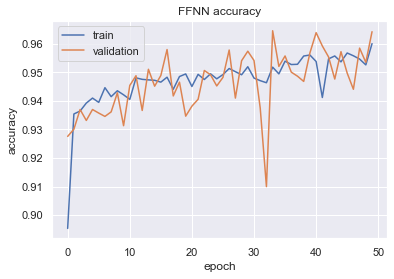

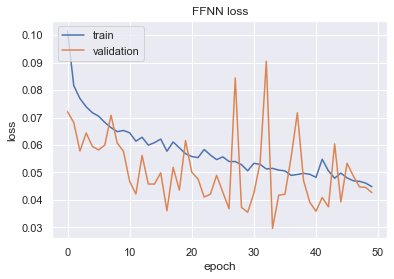

In [19]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('FFNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('accurancy.png', dpi=300, bbox_inches='tight')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('FFNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('loss.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
#Predicting the Test set results
fnn_prediction = fnn.predict(X_test)
prediction_result = (fnn_prediction > 0.5)
prediction_result = prediction_result.astype(float)
# probabilities = [probability[0] for probability in fnn_prediction.tolist()]
# avg_prob = sum(probabilities)/len(probabilities)
# avg_prob
prediction_result

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

,0,1,accuracy,macro avg,weighted avg
precision,1.00,0.31,0.96,0.65,0.98
recall,0.97,0.81,0.96,0.89,0.96
f1-score,0.98,0.45,0.96,0.71,0.97
support,11788.00,212.00,0.96,12000.00,12000.00


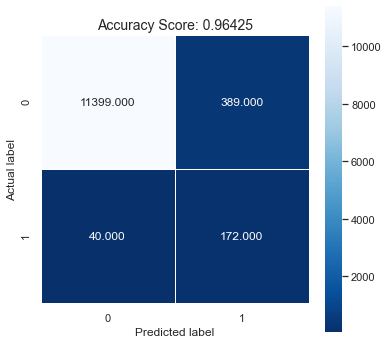

In [45]:
score = metrics.accuracy_score(Y_test, prediction_result)
confusion_matrix = show_confusion_matrix(Y_test, prediction_result, score=score)
confusion_matrix

In [43]:
import numpy as np
confusion_matrix
TP = np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)

FN
# TPR = TP/(TP+FN)
# TP

precision        2.906709
recall           3.784661
f1-score         3.111876
support      24000.964250
dtype: float64

0.9586666666666667

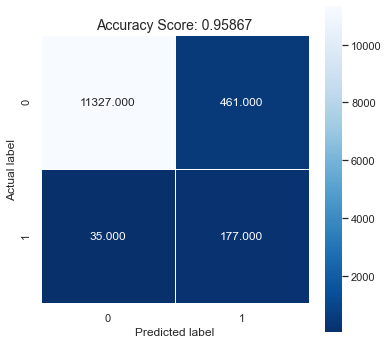

In [105]:
metrics.accuracy_score(Y_test, prediction_result)

In [46]:
test_df_raw = pd.read_csv(path_validation)
test = preprocess_data(test_df_raw.copy())
test = pd.DataFrame(sc.fit_transform(test.values), index=test.index, columns=test.columns)
test.head()

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,-1.731943,-0.002199,-0.137534,2.305865,0.001355,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,...,0.068422,0.493720,0.899019,0.168380,-0.290051,-0.211665,-0.246239,-0.122210,-0.018788,-0.016517
1,-1.731726,0.045932,-0.137534,-0.433677,-0.243155,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,...,0.190169,0.219365,0.377401,0.417630,0.127765,-0.089220,0.271338,0.530521,-0.018788,-0.016517
2,-1.731510,0.299757,-0.137534,-0.433677,-0.243155,-0.053203,-0.059625,-0.018613,-0.019833,0.449771,...,0.459432,1.116632,0.937576,0.586202,2.680476,0.742736,-0.237239,-0.159617,-0.018788,-0.016517
3,-1.731293,-0.135012,-0.137534,-0.433677,-0.222534,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,...,-0.367823,-0.376880,-0.367549,-0.335693,-0.294735,-0.215029,-0.267026,-0.159617,-0.018788,-0.016517
4,-1.731077,-0.057420,-0.137534,-0.433676,0.516890,-0.053203,-0.059625,-0.018613,-0.022989,-0.058134,...,-0.146587,-0.163546,-0.188561,-0.111029,-0.047277,-0.056827,0.184600,-0.114849,-0.018788,-0.016517


In [99]:
test = test.drop(columns=non_time_series_columns)

In [100]:
# Predicting the Test set results
prediction_result = (fnn_prediction > 0.5)
prediction_result = prediction_result.astype(float)
result_df = test_df_raw.copy()

In [101]:
result_df

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,...,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,...,544762,504820,1597028,631494,5644,5448,11096,1982,0,0
1,2,91122,na,na,na,0,0,0,0,0,...,696774,345742,939332,943744,504048,203698,287374,36566,0,0
2,3,218924,na,na,na,na,na,0,280,119070,...,1032974,866000,1645644,1154924,3549128,1550716,15900,0,na,na
3,4,16,0,30,28,0,0,0,0,0,...,70,24,40,12,56,0,0,0,0,0
4,5,39084,na,1054,1032,0,0,0,0,0,...,276304,123720,225722,281462,295244,256146,241074,2372,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996,15997,40084,na,220,162,0,0,0,0,0,...,308874,191260,496016,435224,338588,65906,29024,0,0,0
15997,15998,102790,na,878,502,0,0,0,0,0,...,437566,215902,388712,306692,1390312,1383412,246196,0,0,0
15998,15999,50846,na,870,758,0,0,0,0,0,...,504510,221714,389162,456754,442702,135626,107902,1108,0,0
15999,16000,48,na,2130706434,70,0,0,0,0,0,...,1020,204,124,40,10,0,0,0,0,0
